# Assignment 8 - Decision Tree on Donors choose dataset

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

<p>
Problem Objective - The objective is to predict whether project proposal submitted by a teacher or not, by applying KNN algorithm and deciding the best Feature generation technique for given problem.

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
nltk.downloader.download('vader_lexicon')
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import chart_studio.plotly as py

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 1.1) Reading the data

In [2]:
train_data = pd.read_csv(r"D:\Assignments of Applied AI\Donorschoose data set\train_data.csv", nrows = 30000)
resource_data = pd.read_csv(r"D:\Assignments of Applied AI\Donorschoose data set\resources.csv")

In [3]:
print('Number of data points in the train data', train_data.shape)
print('-'*127)
print('The attributes of the data points in the train data :', train_data.columns.values)
train_data.head(2)

Number of data points in the train data (30000, 17)
-------------------------------------------------------------------------------------------------------------------------------
The attributes of the data points in the train data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(train_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
train_data['Date'] = pd.to_datetime(train_data['project_submitted_datetime'])
train_data.drop('project_submitted_datetime', axis=1, inplace=True)
train_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
train_data = train_data[cols]

#train_data.head(2)

In [5]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2) Preprocessing project_subject_categories

In [6]:
pro_sub_catogories = list(train_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
pro_sub_cat_list = []
for i in pro_sub_catogories:
    train = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        train+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        train = train.replace('&','_') # we are replacing the & value into 
    pro_sub_cat_list.append(train.strip())

In [7]:
train_data['clean_categories'] = pro_sub_cat_list
train_data.drop(['project_subject_categories'], axis=1, inplace=True)

In [8]:
from collections import Counter
my_counter = Counter()
for word in train_data['clean_categories'].values:
    my_counter.update(word.split())

In [9]:
pro_sub_cat_dict = dict(my_counter)
sorted_pro_sub_cat_dict = dict(sorted(pro_sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.3) Preprocessing project_subject_subcategories

In [10]:
pro_sub_subcatogories = list(train_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

pro_sub_subcat_list = []
for i in pro_sub_subcatogories:
    train = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        train +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        train = train.replace('&','_')
    pro_sub_subcat_list.append(train.strip())

In [11]:
train_data['clean_subcategories'] = pro_sub_subcat_list
train_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

In [12]:
from collections import Counter
my_counter = Counter()
for word in train_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [13]:
pro_sub_subcat_dict = dict(my_counter)
sorted_pro_sub_subcat_dict = dict(sorted(pro_sub_subcat_dict.items(), key=lambda kv: kv[1]))

# 1.4) Text Preprocessing the titles

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
clean_titles = []

for titles in tqdm(train_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|█████████████████████████████████| 30000/30000 [00:01<00:00, 23040.15it/s]


In [17]:
train_data["clean_titles"] = clean_titles

In [18]:
train_data.drop(['project_title'], axis=1, inplace=True)

## Number of words in titles

In [19]:
title_word_count = []

In [20]:
for a in train_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [21]:
train_data["title_word_count"] = title_word_count

In [22]:
train_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
29891                                             6                    1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                             clean_titles  title_word_count  
473    flexible seating flexible learning                 4  
29891      breakout box ignite engagement                 4

# 1.5) Combine 4 project essay

In [23]:
# merge two column text dataframe: 
train_data["essay"] = train_data["project_essay_1"].map(str) + train_data["project_essay_2"].map(str) + \
                        train_data["project_essay_3"].map(str) + train_data["project_essay_4"].map(str)

# 1.6) Text preprocessing the essay

In [24]:
clean_essay = []

for ess in tqdm(train_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|██████████████████████████████████| 30000/30000 [00:24<00:00, 1201.52it/s]


In [25]:
train_data["clean_essays"] = clean_essay

In [26]:
train_data.drop(['essay'], axis=1, inplace=True)

## Number of words in Essay

In [27]:
essay_word_count = []

In [28]:
for ess in train_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [29]:
train_data["essay_word_count"] = essay_word_count

In [30]:
train_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
29891                                             6                    1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                             clean_titles  title_word_count  \
473    flexible seating flexible learning                 4   
29891      breakout box ignite engagement                 4   

                                            clean_essays  essay_word_count  
473    i recently read article giving students choice...               127  
29891  it end school year routines run course student...               159

# 1.7) Calculate sentiment score in essay

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [32]:
neg = []
pos = []
neu = []
compound = []

for a in tqdm(train_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|████████████████████████████████████| 30000/30000 [05:57<00:00, 83.95it/s]


In [33]:
train_data["pos"] = pos

In [34]:
train_data["neg"] = neg

In [35]:
train_data["neu"] = neu

In [36]:
train_data["compound"] = compound

In [37]:
train_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  ...  \
473    We need a classroom rug that we can use as a c...  ...   
29891  I will design different clues using specific c...  ...   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                             clean_titles  title_word_count  \
473    flexible seating flexible learning                 4   
29891      breakout box ignite engagement                 4   

                                            clean_essays essay_word_count  \
473    i recently read article giving students choice...              127   
29891  it end school year routines run course student...              159   

         pos    neg    neu  compound  
473    0.187  0.030  0.783    0.9524  
29891  0.286  0.013  0.701    0.9935  

[2 rows x 24 columns]

In [38]:
train_data.project_grade_category = train_data.project_grade_category.str.replace('\s','_')
train_data['project_grade_category'].value_counts()
train_data.project_grade_category = train_data.project_grade_category.str.replace('-','_')
train_data['project_grade_category'].value_counts()

Grades_PreK_2    12204
Grades_3_5       10160
Grades_6_8        4663
Grades_9_12       2973
Name: project_grade_category, dtype: int64

In [39]:
train_data.teacher_prefix = train_data.teacher_prefix.str.replace('.',' ')
train_data['teacher_prefix'].value_counts()

Mrs        15682
Ms         10779
Mr          2895
Teacher      643
Name: teacher_prefix, dtype: int64

In [40]:
train_data.teacher_prefix = train_data.teacher_prefix.str.replace('NaN','0')

# 1.8) Train-Test split

In [41]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_data['project_is_approved'],\
                        test_size=0.33, stratify =train_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [42]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

# 1.9) Preparing data for model

In [43]:
train_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_titles',
       'title_word_count', 'clean_essays', 'essay_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

# Vectorizing the categorial features

## 1.9.1) One hot encode - Clean categories of project_subject_category

In [44]:
# we use count vectorizer to convert the values into one 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_pro_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (13467, 9)
Shape of matrix of Test data after one hot encoding  (9900, 9)
Shape of matrix of CV data after one hot encoding  (6633, 9)


## 1.9.2) One hot encode - Clean categories of project_sub_subcategories

In [45]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_pro_sub_subcat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)

print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (13467, 30)
Shape of matrix of Test data after one hot encoding  (9900, 30)
Shape of matrix of Cross Validation data after one hot encoding  (6633, 30)


## 1.9.3) One hot encode - School states

In [46]:
my_counter = Counter()
for state in train_data['school_state'].values:
    my_counter.update(state.split())

In [47]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [48]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer_state = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_state.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_state.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_state.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_state.transform(X_cv['school_state'].values)

print(vectorizer_state.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'DE', 'AK', 'ME', 'HI', 'WV', 'NM', 'DC', 'ID', 'KS', 'IA', 'AR', 'CO', 'MN', 'KY', 'MS', 'OR', 'NV', 'MD', 'AL', 'CT', 'UT', 'TN', 'WI', 'VA', 'NJ', 'OK', 'AZ', 'MA', 'WA', 'LA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix of Train data after one hot encoding  (13467, 51)
Shape of matrix of Test data after one hot encoding  (9900, 51)
Shape of matrix of Cross Validation data after one hot encoding  (6633, 51)


## 1.9.4) One hot encode - Teacher_prefix

In [49]:
my_counter = Counter()
for teacher_prefix in train_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [50]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [51]:
## we use count vectorizer to convert the values into one hot encoded features
## Unlike the previous Categories this category returns a
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809
vectorizer_teacher = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_teacher.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values.astype("U"))

print(vectorizer_teacher.get_feature_names())

print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['nan', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encoding  (13467, 5)
Shape of matrix after one hot encoding  (9900, 5)
Shape of matrix after one hot encoding  (6633, 5)


## 1.9.5) One hot encode - project_grade_category

In [52]:
my_counter = Counter()
for project_grade in train_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [53]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [54]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
Shape of matrix of Train data after one hot encoding  (13467, 4)
Shape of matrix of Test data after one hot encoding  (9900, 4)
Shape of matrix of Cross Validation data after one hot encoding  (6633, 4)


# Vectorizing the text data

## I) Bag of words - with min_df=10

### Bag of words - Train Data - Essays

In [55]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).

vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(X_train["clean_essays"])
text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (13467, 7157)


### Bag of words - Test Data - Essays

In [56]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (9900, 7157)


### Bag of words - CV Data - Essays

In [57]:
text_bow_cv = vectorizer_bow_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (6633, 7157)


### Bag of words - Train Data - Title

In [58]:
vectorizer_bow_title = CountVectorizer(min_df=10)

vectorizer_bow_title.fit(X_train["clean_titles"])

title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (13467, 827)


### Bag of words - Test Data - Title

In [59]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (9900, 827)


### Bag of words - CV Data - Title

In [60]:
title_bow_cv = vectorizer_bow_title.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (6633, 827)


## II) TFIDF vectorizer with min_df=10

### TFIDF - Train Data - Essays

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train["clean_essays"])

text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (13467, 7157)


### TFIDF - Test Data - Essays

In [62]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (9900, 7157)


### TFIDF - CV Data - Essays

In [63]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (6633, 7157)


### TFIDF - Train Data - Titles

In [64]:
vectorizer_tfidf_titles = TfidfVectorizer(min_df=10)

vectorizer_tfidf_titles.fit(X_train["clean_titles"])
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (13467, 827)


### TFIDF - Test Data - Titles

In [65]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (9900, 827)


### TFIDF - CV Data - Titles

In [66]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (6633, 827)


## III) Using pretrained model - Avg W2V

In [67]:
with open (r'C:\Users\lenovo\Downloads\glove_vectors', "rb") as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

### Train - Essays

In [68]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████████████████████████████| 13467/13467 [00:06<00:00, 2087.79it/s]


13467
300


### Test - Essays

In [69]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|████████████████████████████████████| 9900/9900 [00:04<00:00, 2056.38it/s]


9900
300


### CV - Essays

In [70]:
avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|████████████████████████████████████| 6633/6633 [00:03<00:00, 2045.21it/s]


6633
300


### Train - Titles

In [71]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 13467/13467 [00:00<00:00, 29661.30it/s]


13467
300


### Test - Titles

In [72]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|███████████████████████████████████| 9900/9900 [00:00<00:00, 28123.38it/s]


9900
300


### CV - Titles

In [73]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|███████████████████████████████████| 6633/6633 [00:00<00:00, 29876.66it/s]


6633
300


## IV) Using pretrained model - TFIDF weighted W2V

### Train - Essays

In [74]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████| 13467/13467 [00:49<00:00, 271.81it/s]


13467
300


### Test - Essays

In [76]:
# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|█████████████████████████████████████| 9900/9900 [00:35<00:00, 276.94it/s]


9900
300


### CV - Essays

In [77]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|█████████████████████████████████████| 6633/6633 [00:23<00:00, 276.73it/s]


6633
300


### Train - Titles

In [78]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [79]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 13467/13467 [00:00<00:00, 14879.81it/s]


13467
300


### Test - Titles

In [80]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|███████████████████████████████████| 9900/9900 [00:00<00:00, 15589.66it/s]


9900
300


### CV - Titles

In [81]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|███████████████████████████████████| 6633/6633 [00:00<00:00, 15282.54it/s]


6633
300


# 1.8) Vectorizing numerical features 

In [82]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [83]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

### 1) Price

In [84]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 2) Quantity

In [85]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)


After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 3) Project proposal previously by Teacher

In [86]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 4) Number of word in title

In [87]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 5) Number of word in essay

In [88]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 6) Essay sentiment - pos

In [89]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 7) Essay sentiment - neg

In [90]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 8) Essay sentiment - neu

In [91]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


### 9) Essay sentiment - compound

In [92]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_compound_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_compound_cv = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_compound_test = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_compound_train.shape, y_train.shape)
print(essay_sent_compound_cv.shape, y_cv.shape)
print(essay_sent_compound_test.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 1) (13467,)
(6633, 1) (6633,)
(9900, 1) (9900,)


# 2) Decision Tree

## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW  with min_df=10)


In [93]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_compound_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_compound_test, title_bow_test, text_bow_test)).tocsr()
X_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv, title_bow_cv, text_bow_cv)).tocsr()


In [94]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 8092) (13467,)
(6633, 8092) (6633,)
(9900, 8092) (9900,)


## A) GraphViz - Decision Tree

In [95]:
bow_features_names = []

In [96]:
## Obtain Feature names for Project titles

for a in vectorizer_proj.get_feature_names() :
    bow_features_names.append(a)

In [97]:
## Obtain Feature names for Project Sub-titles
for a in vectorizer_sub_proj.get_feature_names() :
    bow_features_names.append(a)

In [98]:
## Obtain Feature names for states 
for a in vectorizer_state.get_feature_names() :
    bow_features_names.append(a)

In [99]:
## Obtain Feature names for Project Grade Category
for a in vectorizer_grade.get_feature_names() :
    bow_features_names.append(a)

In [100]:
## Obtain Feature names for Teacher Title
for a in vectorizer_teacher.get_feature_names() :
    bow_features_names.append(a)

In [101]:
len(bow_features_names)

99

In [102]:
bow_features_names.append("price")

In [103]:
bow_features_names.append("quantity")

In [104]:
bow_features_names.append("prev_proposed_projects")

In [105]:
bow_features_names.append("title_word_count")

In [106]:
bow_features_names.append("essay_word_count")

In [107]:
bow_features_names.append("pos")

In [108]:
bow_features_names.append("neg")

In [109]:
bow_features_names.append("neu")

In [110]:
bow_features_names.append("compound")

In [111]:
for a in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(a)

In [112]:
for a in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(a)

In [113]:
len(bow_features_names)

8092

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [115]:
clf = dtree.fit(X_tr, y_train)

In [116]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
import pydot


dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=bow_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Bow tree",view = True)

'Bow tree.pdf'

## B) GridSearch CV

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [118]:
%%time
dt = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc', return_train_score = True,n_jobs = -1)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 6min 6s


In [119]:
train_auc

array([0.54929035, 0.54929035, 0.54929035, 0.54929035, 0.61365026,
       0.61372509, 0.61312478, 0.60997335, 0.68353395, 0.68184962,
       0.67614409, 0.66066493, 0.93366113, 0.92356242, 0.89795121,
       0.81698818, 0.98327265, 0.97662718, 0.95556707, 0.88909227,
       0.99873449, 0.99357097, 0.97613816, 0.93014687, 0.98333657,
       0.97496737, 0.95881796, 0.89422932])

In [120]:
cv_auc

array([0.54641034, 0.54641034, 0.54641034, 0.54641034, 0.58187409,
       0.58026422, 0.58151343, 0.58124946, 0.59420715, 0.59574076,
       0.5971687 , 0.59723034, 0.5259166 , 0.52703166, 0.55335702,
       0.57456655, 0.50894068, 0.51468934, 0.52897926, 0.54964533,
       0.52370358, 0.52236297, 0.53265613, 0.54222163, 0.50804497,
       0.51220575, 0.52592894, 0.54823398])

## Plot for Train Data

In [121]:
import plotly.graph_objs as go

In [122]:
def get_config():
    """Returns either module config or file config."""
    config = tools.get_config_file()
    session_config = session.get_session_config()
    for config_key in config:

        # checking for not false, but truthy value here is the desired behavior
        session_value = session_config.get(config_key)
        if session_value is False or session_value:
            config[config_key] = session_value
    return config

In [123]:
def get_credentials():
    """Returns the credentials that will be sent to plotly."""
    credentials = tools.get_credentials_file()
    session_credentials = session.get_session_credentials()
    for credentials_key in credentials:

        # checking for not false, but truthy value here is the desired behavior
        session_value = session_credentials.get(credentials_key)
        if session_value is False or session_value:
            credentials[credentials_key] = session_value
    return credentials

In [124]:
import pandas as pd
import chart_studio.plotly
from chart_studio.plotly import plot, iplot

chart_studio.tools.set_credentials_file(username='jaychaudhari', api_key='6Rw12VPU6KMFWQIZouex')

In [125]:
x1 = [0.54929035, 0.54929035, 0.54929035, 0.54929035, 0.61365026,
       0.61372509, 0.61312478, 0.60997335, 0.68353395, 0.68184962,
       0.67614409, 0.66066493, 0.93366113, 0.92356242, 0.89795121,
       0.81698818, 0.98327265, 0.97662718, 0.95556707, 0.88909227,
       0.99873449, 0.99357097, 0.97613816, 0.93014687, 0.98333657,
       0.97496737, 0.95881796, 0.89422932]

In [126]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x1)

In [127]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [128]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [129]:
data = [trace]

In [130]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [131]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-a', height=700)

## Plot for CV data

In [132]:
x2 = [0.54641034, 0.54641034, 0.54641034, 0.54641034, 0.58187409,
       0.58026422, 0.58151343, 0.58124946, 0.59420715, 0.59574076,
       0.5971687 , 0.59723034, 0.5259166 , 0.52703166, 0.55335702,
       0.57456655, 0.50894068, 0.51468934, 0.52897926, 0.54964533,
       0.52370358, 0.52236297, 0.53265613, 0.54222163, 0.50804497,
       0.51220575, 0.52592894, 0.54823398]

In [133]:
z2 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x2)

In [134]:
y2 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x2)

In [135]:
trace = go.Scatter3d(x=x2, y=y2, z=z2,
    marker=dict(size=4, color='#ff7f0e', colorscale='Viridis'),
    line=dict(color='#1f77b4', width=1))

In [136]:
data = [trace]

In [137]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Cross Validation Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [138]:
fig = dict(data=data, layout=layout) 

py.iplot(fig, filename='jay-dt-b', height=900)

## Summary - 
From the 2 plots we know that the Decision Tree with a depth of 100 & 500 works fantastic on Training Data but performs quite badly on invisible information (cross validation information). = > Perhaps an Overfitting case. In both Train information and Cross Validation Data, decision trees with depth 1 & 5 perform poorly. = > Probably a Underfitting case. The value '100' is considered as the minimum sample value per split.

## B) Train the model using the best hyperparameter value

In [139]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

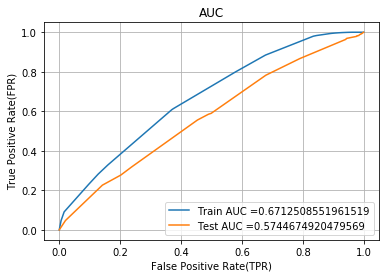

In [140]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion matrix

In [141]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

##### Train data

In [142]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.14638232666000311 for threshold 0.847
[[1295  779]
 [4394 6999]]


In [143]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.14638232666000311 for threshold 0.847


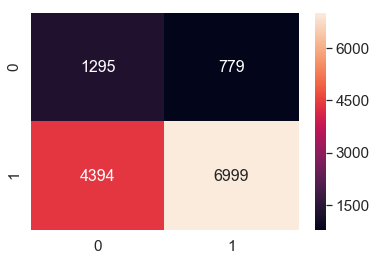

In [144]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

##### Test data

In [145]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2047307854171764 for threshold 0.88
[[ 833  692]
 [3720 4655]]


In [146]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2047307854171764 for threshold 0.88


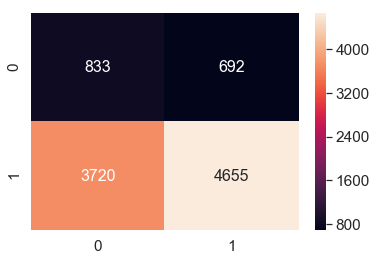

In [147]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## D) Obtaining the False Positive words from BOW encoded Essays

In [148]:
bow_test = text_bow_test.todense()

In [149]:
bow_test.shape

(9900, 7157)

In [150]:
vectorizer_bow_essay = CountVectorizer(min_df=10)

a = vectorizer_bow_essay.fit(X_train["clean_essays"])

In [151]:
bow_features = a.get_feature_names()

In [152]:
len(bow_features)

7157

In [153]:
y_test_converted = list(y_test[::])

In [154]:
false_positives_index_p = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.839:
        false_positives_index_p.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|█████████████████████████████████| 9900/9900 [00:00<00:00, 1414195.55it/s]


In [155]:
fp_count

764

In [156]:
false_positives_index_p[0:7]

[28, 38, 47, 55, 81, 86, 104]

In [157]:
df1 = pd.DataFrame(bow_test)

In [158]:
df1_final = df1.iloc[false_positives_index_p,:]

In [159]:
df1_final.shape

(764, 7157)

In [160]:
df1_final[0].sum()

4

In [163]:
best_indices = []

for j in range(7157):
    
    s = df1_final[j].sum()
    
    if s >= 100 :
        best_indices.append(j)
    else :
        continue

In [164]:
len(best_indices)

180

In [165]:
best_indices[0:10]

[142, 155, 166, 218, 220, 345, 349, 361, 367, 372]

In [166]:
bow_features[0:10]

['00', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12']

In [167]:
fp_words = []

for a in best_indices :
    fp_words.append(str(bow_features[a]))

In [168]:
fp_words[0:10]

['able',
 'academic',
 'access',
 'active',
 'activities',
 'all',
 'allow',
 'also',
 'always',
 'amazing']

## E) Word cloud for false positive words

In [169]:
from wordcloud import WordCloud

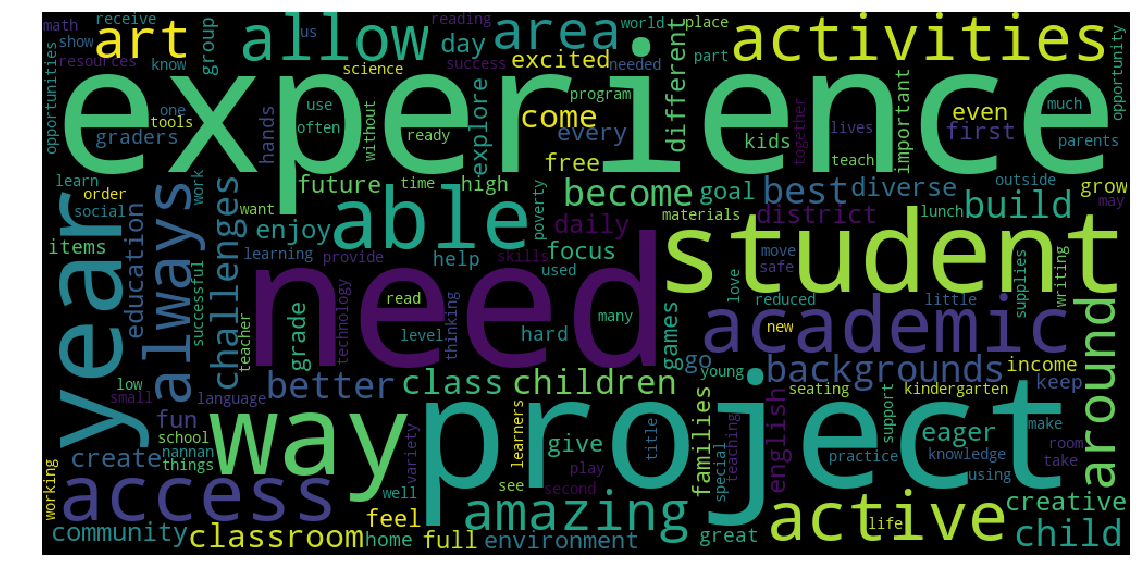

In [170]:
#convert list to string and generate
unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("jay1"+".png", bbox_inches='tight')
plt.show()
plt.close()

## F) Box - Plot with the price of these False positive data points

In [171]:
len(false_positives_index_p)

764

In [172]:
df2 = pd.DataFrame(X_test['price'])

In [173]:
df2_final = df2.iloc[false_positives_index_p,:]

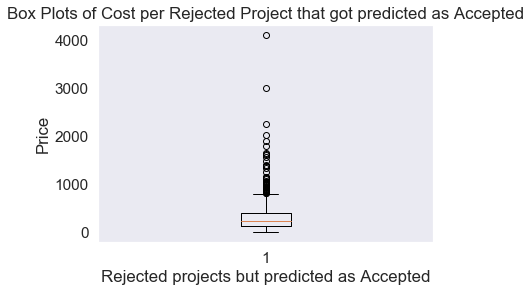

In [174]:
plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

##### Summary - Majority of projects rejected but predicted as accepted cost nearly less than 500 dollars. A few of them are Extremely costing over 3000 dollars.

## G) PDF with the Teacher_number_of_previously_posted_projects of these False Positive data points

In [175]:
df3 = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [176]:
df3_final = df3.iloc[false_positives_index_p,:]

In [177]:
df3_final.shape

(764, 1)

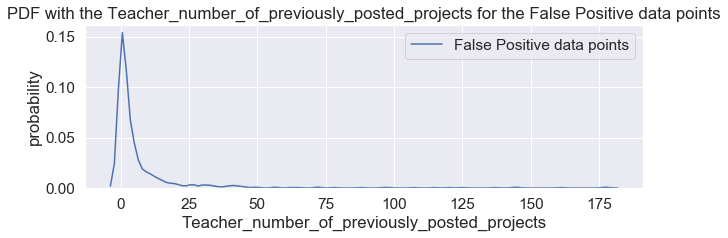

In [178]:
plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

##### Summary - Most cases have teachers with projects previously posted as 0 (nearly 10% of the total data)

# Set 2 : Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF min_df=10)

In [179]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_compound_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_compound_test, title_tfidf_test, text_tfidf_test)).tocsr()
X_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv, title_tfidf_cv, text_tfidf_cv)).tocsr()


In [180]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 8092) (13467,)
(6633, 8092) (6633,)
(9900, 8092) (9900,)


## GraphViz - Decision Tree

In [181]:
tfidf_features_names = []

In [182]:
## Obtain Feature names for Project titles

for a in vectorizer_proj.get_feature_names() :
    tfidf_features_names.append(a)

In [183]:
## Obtain Feature names for Project Sub-titles
for a in vectorizer_sub_proj.get_feature_names() :
    tfidf_features_names.append(a)

In [184]:
## Obtain Feature names for states 
for a in vectorizer_state.get_feature_names() :
    tfidf_features_names.append(a)

In [185]:
## Obtain Feature names for Project Grade Category
for a in vectorizer_grade.get_feature_names() :
    tfidf_features_names.append(a)

In [186]:
## Obtain Feature names for Teacher Title
for a in vectorizer_teacher.get_feature_names() :
    tfidf_features_names.append(a)

In [187]:
tfidf_features_names.append("price")

In [188]:
tfidf_features_names.append("quantity")

In [189]:
tfidf_features_names.append("prev_proposed_projects")

In [190]:
tfidf_features_names.append("title_word_count")

In [191]:
tfidf_features_names.append("essay_word_count")

In [192]:
tfidf_features_names.append("pos")

In [193]:
tfidf_features_names.append("neg")

In [194]:
tfidf_features_names.append("neu")

In [195]:
tfidf_features_names.append("compound")

In [196]:
for a in vectorizer_tfidf_titles.get_feature_names() :
    tfidf_features_names.append(a)

In [197]:
for a in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(a)

In [198]:
len(tfidf_features_names)

8092

In [199]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [200]:
clf = dtree.fit(X_tr, y_train)

In [201]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Tfidf tree",view = True)

'Tfidf tree.pdf'

## A) GridSearch CV

In [202]:
%%time
dt_2 = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt_2, parameters, cv= 10, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 17min 11s


In [203]:
train_auc

array([0.55827265, 0.55827265, 0.55827265, 0.55827265, 0.61391704,
       0.6137419 , 0.61193757, 0.60942061, 0.66119537, 0.65926863,
       0.64791485, 0.63700491, 0.85797503, 0.85334134, 0.82450372,
       0.77965116, 0.92343563, 0.91839355, 0.88741173, 0.85594146,
       0.99937784, 0.99489899, 0.9734131 , 0.9554526 , 0.99939284,
       0.99486983, 0.97234784, 0.95807818])

In [204]:
cv_auc

array([0.55697293, 0.55697293, 0.55697293, 0.55697293, 0.58080082,
       0.57987828, 0.58195986, 0.58358814, 0.57103863, 0.57478039,
       0.58117442, 0.58847364, 0.49269694, 0.49385572, 0.52735512,
       0.54604222, 0.48202422, 0.49526988, 0.52643218, 0.54499717,
       0.54184157, 0.54061027, 0.55867478, 0.57135859, 0.53929559,
       0.54281828, 0.56659595, 0.56226204])

## Plot for Train Data

In [206]:
x1 = [0.55827265, 0.55827265, 0.55827265, 0.55827265, 0.61391704,
       0.6137419 , 0.61193757, 0.60942061, 0.66119537, 0.65926863,
       0.64791485, 0.63700491, 0.85797503, 0.85334134, 0.82450372,
       0.77965116, 0.92343563, 0.91839355, 0.88741173, 0.85594146,
       0.99937784, 0.99489899, 0.9734131 , 0.9554526 , 0.99939284,
       0.99486983, 0.97234784, 0.95807818]

In [207]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x1)

In [208]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [209]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [210]:
data = [trace]

In [211]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [212]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-c', height=900)

## Plot for CV data

In [213]:
x2 = [0.55697293, 0.55697293, 0.55697293, 0.55697293, 0.58080082,
       0.57987828, 0.58195986, 0.58358814, 0.57103863, 0.57478039,
       0.58117442, 0.58847364, 0.49269694, 0.49385572, 0.52735512,
       0.54604222, 0.48202422, 0.49526988, 0.52643218, 0.54499717,
       0.54184157, 0.54061027, 0.55867478, 0.57135859, 0.53929559,
       0.54281828, 0.56659595, 0.56226204]

In [214]:
z2 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x2)

In [215]:
y2 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x2)

In [216]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [217]:
data = [trace]

In [218]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [219]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-d', height=900)

##### Summary - From the 2 plots, we understand that the Decision Tree with a depth of 100, 500, 1000 performs great on Training Data but performs quite badly on unseen data (cross validation data) = > Probably an overfitting case. In both Train data and Cross Validation Data, decision trees with depths 1 & 5 are poor. = > Probably the Underfitting case. Decision Tree performs fairly well on both Train and Cross Validation Data with maximum depth of 10. Minimum sample value per split is taken into account 500.

## B) Train the model using the best hyper parameter value

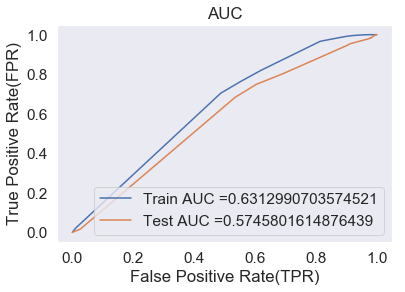

In [220]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

##### Train data

In [221]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.14431804841169876 for threshold 0.887
[[1063 1011]
 [3373 8020]]


In [222]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.14431804841169876 for threshold 0.887


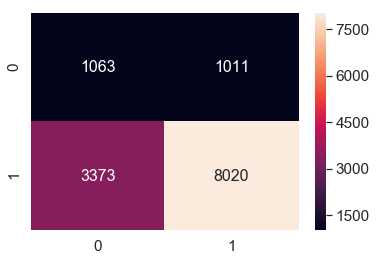

In [223]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

##### Test data

In [224]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.1693734083679961 for threshold 0.887
[[ 709  816]
 [2651 5724]]


In [225]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.1693734083679961 for threshold 0.887


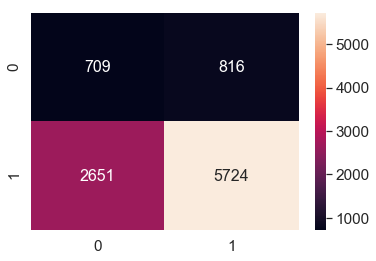

In [226]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

## D) Obtaining the False Positive words from TFIDF encoded Essays

In [227]:
tfidf_test = text_tfidf_test.todense()

In [228]:
tfidf_test.shape

(9900, 7157)

In [229]:
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
bv = vectorizer_tfidf_essay.fit(X_train["clean_essays"])

In [230]:
tfidf_features = bv.get_feature_names()

In [231]:
len(tfidf_features)

7157

In [232]:
y_test_converted = list(y_test[::])

In [233]:
false_positives_index_b = []
fp_count = 0

In [234]:
for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.84:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|█████████████████████████████████| 9900/9900 [00:00<00:00, 1414195.55it/s]


In [235]:
fp_count

709

In [236]:
false_positives_index_b[0:5]

[20, 35, 38, 49, 50]

In [237]:
df2 = pd.DataFrame(tfidf_test)

In [238]:
df2_final = df2.iloc[false_positives_index_b,:]

In [239]:
df2_final.shape

(709, 7157)

In [240]:
best_indices_b = []

for j in range(7157):
    
    s = df2_final[j].sum()
    
    if s >= 10 :
        best_indices_b.append(j)
    else :
        continue

In [241]:
len(best_indices_b)

80

In [242]:
best_indices_b[0:10]

[142, 220, 349, 361, 495, 747, 817, 1095, 1152, 1194]

In [243]:
tfidf_features[0:10]

['00', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12']

In [244]:
fp_words_b = []

for a in best_indices_b :
    fp_words_b.append(str(tfidf_features[a]))

In [245]:
fp_words_b[0:10]

['able',
 'activities',
 'allow',
 'also',
 'art',
 'best',
 'books',
 'challenges',
 'children',
 'class']

## E) Word Cloud for False Positives words

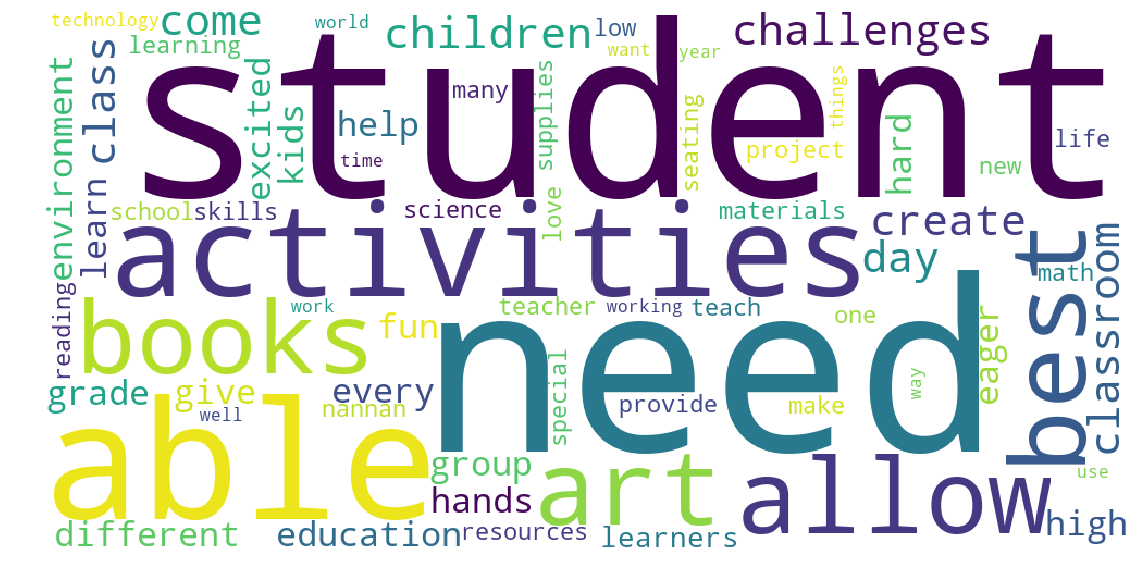

In [246]:
#convert list to string and generate
unique_string=(" ").join(fp_words_b)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("jay-2"+".png", bbox_inches='tight')
plt.show()
plt.close()

## F) Box - Plot with the price of these False positive data points

In [247]:
df2_b = pd.DataFrame(X_test['price'])

In [248]:
df2_b_final = df2_b.iloc[false_positives_index_b,:]

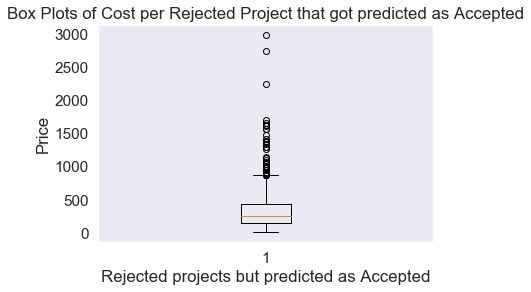

In [249]:
plt.boxplot(df2_b_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

##### Summary - Majority of projects rejected but predicted as accepted cost nearly less than 500 dollars. A good number of projects that are incorrectly predicted cost about 1000-2000 dollars. A few of them cost more than 2000 dollars extremely expensive.

## G) PDF with the Teacher_number_of_previously_posted_projects of these False Positive data points

In [250]:
df3_b = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [251]:
df3_b_final = df3_b.iloc[false_positives_index_b,:]

In [252]:
df3_b_final.shape

(709, 1)

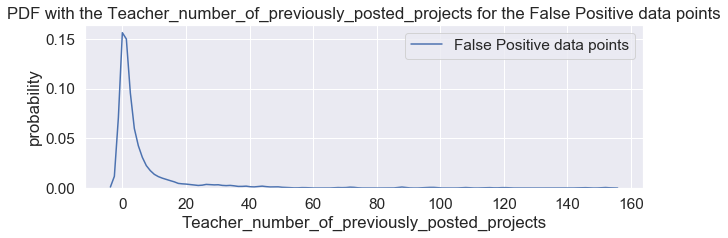

In [253]:
plt.figure(figsize=(10,3))
sns.distplot(df3_b_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

##### Summary - Most cases have teachers with projects previously posted as close to 0. Good percent of teachers have previously posted 10 or fewer projects.

# Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [254]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_compound_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_compound_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [255]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 708) (13467,)
(6633, 708) (6633,)
(9900, 708) (9900,)


## A) GridSearch CV

In [256]:
%%time
dt_3 = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt_3, parameters, cv= 3, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 6min 17s


In [257]:
train_auc

array([0.56554884, 0.56554884, 0.56554884, 0.56554884, 0.66773244,
       0.66764772, 0.66496252, 0.65555792, 0.80567668, 0.80398126,
       0.75894765, 0.71185993, 0.99894617, 0.99478365, 0.94080714,
       0.82967211, 0.99955625, 0.99617369, 0.94373245, 0.83473709,
       0.99955493, 0.99639056, 0.94178259, 0.8354111 , 0.99954849,
       0.99654942, 0.94284959, 0.83198383])

In [258]:
cv_auc

array([0.54125954, 0.54125954, 0.54125954, 0.54125954, 0.5741055 ,
       0.57450713, 0.57455891, 0.57934561, 0.53171159, 0.53123936,
       0.5526647 , 0.58155683, 0.49397154, 0.50449733, 0.54233034,
       0.58028868, 0.52626151, 0.53024443, 0.55072964, 0.57146361,
       0.5291627 , 0.52893821, 0.54902328, 0.57674842, 0.52527672,
       0.52845046, 0.54949239, 0.57682323])

## Plot for Train Data

In [259]:
x1 = [0.55960385, 0.55960385, 0.55960385, 0.55960385, 0.65120822,
       0.65113021, 0.64933107, 0.6469867 , 0.76791258, 0.76418425,
       0.72625188, 0.69854503, 0.99368719, 0.99179254, 0.93474349,
       0.8191417 , 0.99948309, 0.99695181, 0.93930251, 0.83285881,
       0.99951126, 0.99653785, 0.939705  , 0.83318927, 0.99950086,
       0.99671564, 0.93980521, 0.83351059]

In [260]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x1)

In [261]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [262]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [263]:
data = [trace]

In [264]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [265]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-e', height=900)

## Plot for CV data

In [266]:
x2 = [0.55526803, 0.55526803, 0.55526803, 0.55526803, 0.59168758,
       0.59191601, 0.59323884, 0.59341913, 0.55181211, 0.54972876,
       0.57488386, 0.59338809, 0.49376144, 0.49961863, 0.53819625,
       0.57373729, 0.52685025, 0.52928344, 0.55377961, 0.57669133,
       0.52052646, 0.53013572, 0.54857985, 0.57151587, 0.5250814 ,
       0.52539819, 0.54930628, 0.57635753]

In [267]:
z2 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x2)

In [268]:
y2 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x2)

In [269]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [270]:
data = [trace]

In [271]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [272]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-f', height=900)

##### Summary - From the 2 plots we understand that the Decision Tree with a depth of 500, 1000 performs great on training data but performs quite badly on unseen data (cross validation data). = > Probably an overfitting case. In both Train data and Cross Validation Data, the decision trees with depth 1 are poor. = > Probably the Underfitting case. In both Train and Cross Validation Data, Decision Tree with maximum depth of 5 or 10 performs fairly well. The minimum sample value per split shall be considered as 500.

## B) Train the model using the best hyper parameter value

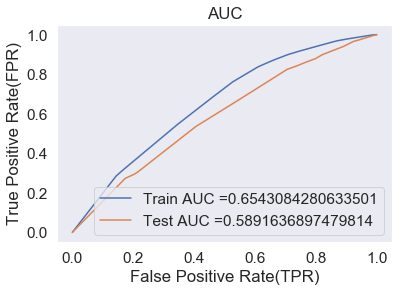

In [273]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

##### Train data

In [274]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.15687160423752392 for threshold 0.868
[[1125  949]
 [3644 7749]]


In [275]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.15687160423752392 for threshold 0.868


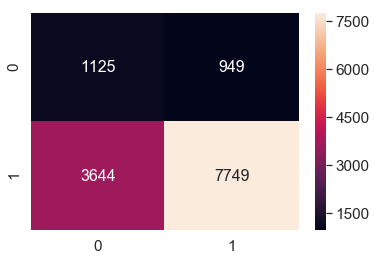

In [276]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

##### Test data

In [277]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.18846958649376072 for threshold 0.876
[[ 907  618]
 [3895 4480]]


In [278]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.18846958649376072 for threshold 0.876


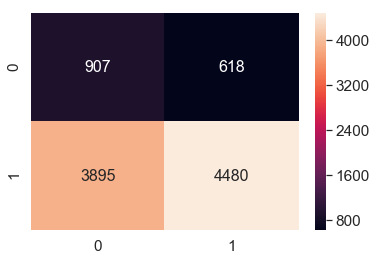

In [279]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

# Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [280]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_compound_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_compound_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [281]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 708) (13467,)
(6633, 708) (6633,)
(9900, 708) (9900,)


## A) GridSearch CV

In [282]:
%%time
dt_4 = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt_4, parameters, cv= 3, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 5min 54s


In [283]:
train_auc

array([0.57215947, 0.57215947, 0.57215947, 0.57215947, 0.67872082,
       0.67855169, 0.67454367, 0.66770954, 0.81722481, 0.81341066,
       0.7596265 , 0.7243461 , 0.99853421, 0.99485095, 0.93196726,
       0.82393301, 0.99943974, 0.99571892, 0.93270481, 0.82475623,
       0.99943301, 0.9959345 , 0.93309192, 0.82801813, 0.99949732,
       0.99587244, 0.93272614, 0.82711885])

In [284]:
cv_auc

array([0.55251446, 0.55251446, 0.55251446, 0.55251446, 0.58613344,
       0.58568519, 0.58571023, 0.58692066, 0.54346911, 0.54462971,
       0.57254508, 0.583909  , 0.51157413, 0.52103631, 0.55153206,
       0.56932504, 0.52216117, 0.52042118, 0.55251615, 0.57122086,
       0.52139072, 0.52369893, 0.55197404, 0.57176248, 0.5230741 ,
       0.52724699, 0.5519019 , 0.57048537])

## Plot for Train Data

In [285]:
x1 = [0.56271324, 0.56271324, 0.56271324, 0.56271324, 0.66184306,
       0.66179093, 0.6612456 , 0.65853433, 0.80361621, 0.79976947,
       0.76412809, 0.71270869, 0.99930251, 0.99598889, 0.93888541,
       0.79760008, 0.99953566, 0.99667225, 0.94065935, 0.79949204,
       0.99955714, 0.99672232, 0.94000936, 0.79470076, 0.99950974,
       0.99669057, 0.94049381, 0.79508168]

In [286]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x1)

In [287]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [288]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [289]:
data = [trace]

In [290]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [291]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-g', height=900)

## Plot for CV data

In [292]:
x2 = [0.55691433, 0.55691433, 0.55691433, 0.55691433, 0.59622595,
       0.59628975, 0.59630963, 0.59778743, 0.54178585, 0.54230412,
       0.55748314, 0.58508047, 0.51668209, 0.51233387, 0.53215356,
       0.57173744, 0.5171982 , 0.52038642, 0.53681924, 0.57300916,
       0.51643458, 0.51932076, 0.53674707, 0.57153129, 0.51576762,
       0.52104475, 0.53775576, 0.57248741]

In [293]:
z2 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x2)

In [294]:
y2 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x2)

In [295]:
trace = go.Scatter3d(x=x1, y=y1, z=z1,
    marker=dict(size=4,color= '#ff7f0e',colorscale='Viridis'),
    line=dict(color='#1f77b4',width=1))

In [296]:
data = [trace]

In [297]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [298]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jay-dt-h', height=900)

##### Summary - From the 2 plots we understand that the Decision Tree with a depth of 500, 1000 performs great on training data but performs quite badly on unseen data (cross validation data). = > Probably an overfitting case. In both Train data and Cross Validation Data, the decision trees with depth 1 are poor. = > Probably the Underfitting case. In both Train and Cross Validation Data, Decision Tree with maximum depth of 10 performs fairly well. The minimum sample value per split shall be considered as 100.

## B) Train the model using the best hyper parameter value

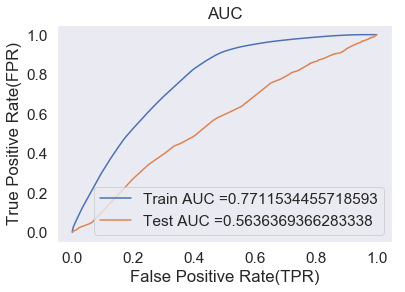

In [299]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

##### Train data

In [300]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.09758885258428573 for threshold 0.881
[[1258  816]
 [2060 9333]]


In [301]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.09758885258428573 for threshold 0.881


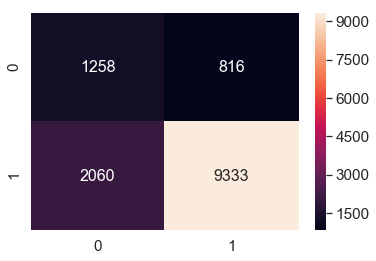

In [302]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

##### Test data

In [303]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.20522718864692926 for threshold 0.902
[[ 820  705]
 [3635 4740]]


In [304]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.20522718864692926 for threshold 0.902


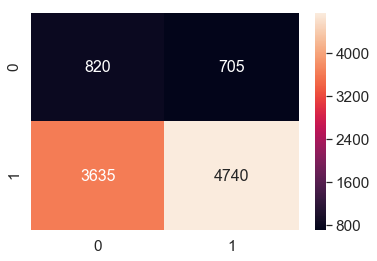

In [305]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

# [Task 2] Select best 5k features from Set 2

In [306]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_compound_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_compound_test, title_tfidf_test, text_tfidf_test)).tocsr()
X_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv, title_tfidf_cv, text_tfidf_cv)).tocsr()


In [307]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(13467, 8092) (13467,)
(6633, 8092) (6633,)
(9900, 8092) (9900,)


In [308]:
## Fit the Model to obtain the best 5k features

model = DecisionTreeClassifier(max_features = 5000, class_weight = "balanced", random_state = 0)
dtype = np.float32
model.fit(X_tr, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=5000, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [309]:
## Feature importances for our Train Features

a=model.tree_.compute_feature_importances(normalize=False)

In [310]:
df9 = pd.DataFrame(a)

In [311]:
df9 = np.transpose(df9)

In [332]:
## Store the indexes of the features with atleast some importance. Lets ignore the features with 0
## as the feature importance value and instead consider all the values other than these 

best_ind = []

for j in range(72):
    
    s = df9[j].sum()
    
    if s > 0 :
        best_ind.append(j)
    else :
        continue

In [333]:
a[0:2]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [334]:
## Identify number of Features after feature importance step
len(best_ind)

10

In [335]:
best_ind[0:10]

[0, 6, 8, 20, 29, 37, 44, 48, 52, 65]

In [336]:
## Convert the sparse matrix to a dense matrix to separate the important features and its corresponding values.
a = X_tr.todense()

In [337]:
a.shape

(13467, 8092)

In [338]:
df_set_5_x_train = pd.DataFrame(a)

In [339]:
final_df = df_set_5_x_train.iloc[:, best_ind]

In [340]:
final_df.shape

(13467, 10)

In [341]:
y_train.shape

(13467,)

In [342]:
b = X_te.todense()

In [343]:
b.shape

(9900, 8092)

In [344]:
df_set_5_x_test = pd.DataFrame(b)

In [345]:
final_df_test = df_set_5_x_test.iloc[best_ind,:]

In [346]:
final_df_test.shape

(10, 8092)

## A) GridSearchCV - L2 regularization

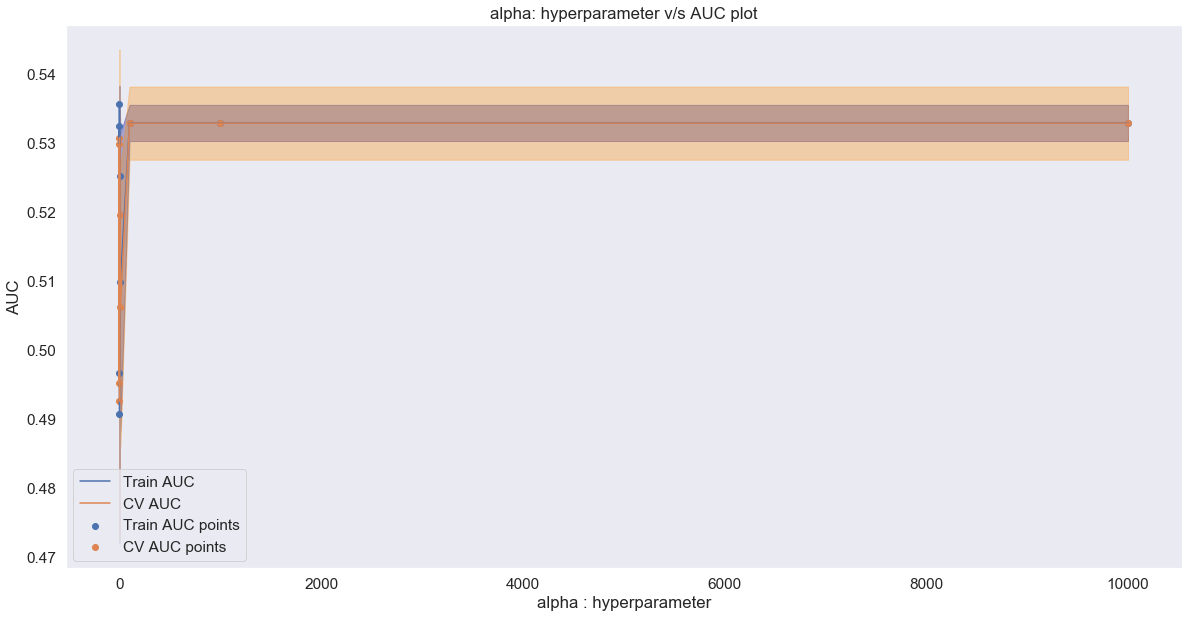

In [347]:
from sklearn.linear_model import SGDClassifier 

sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

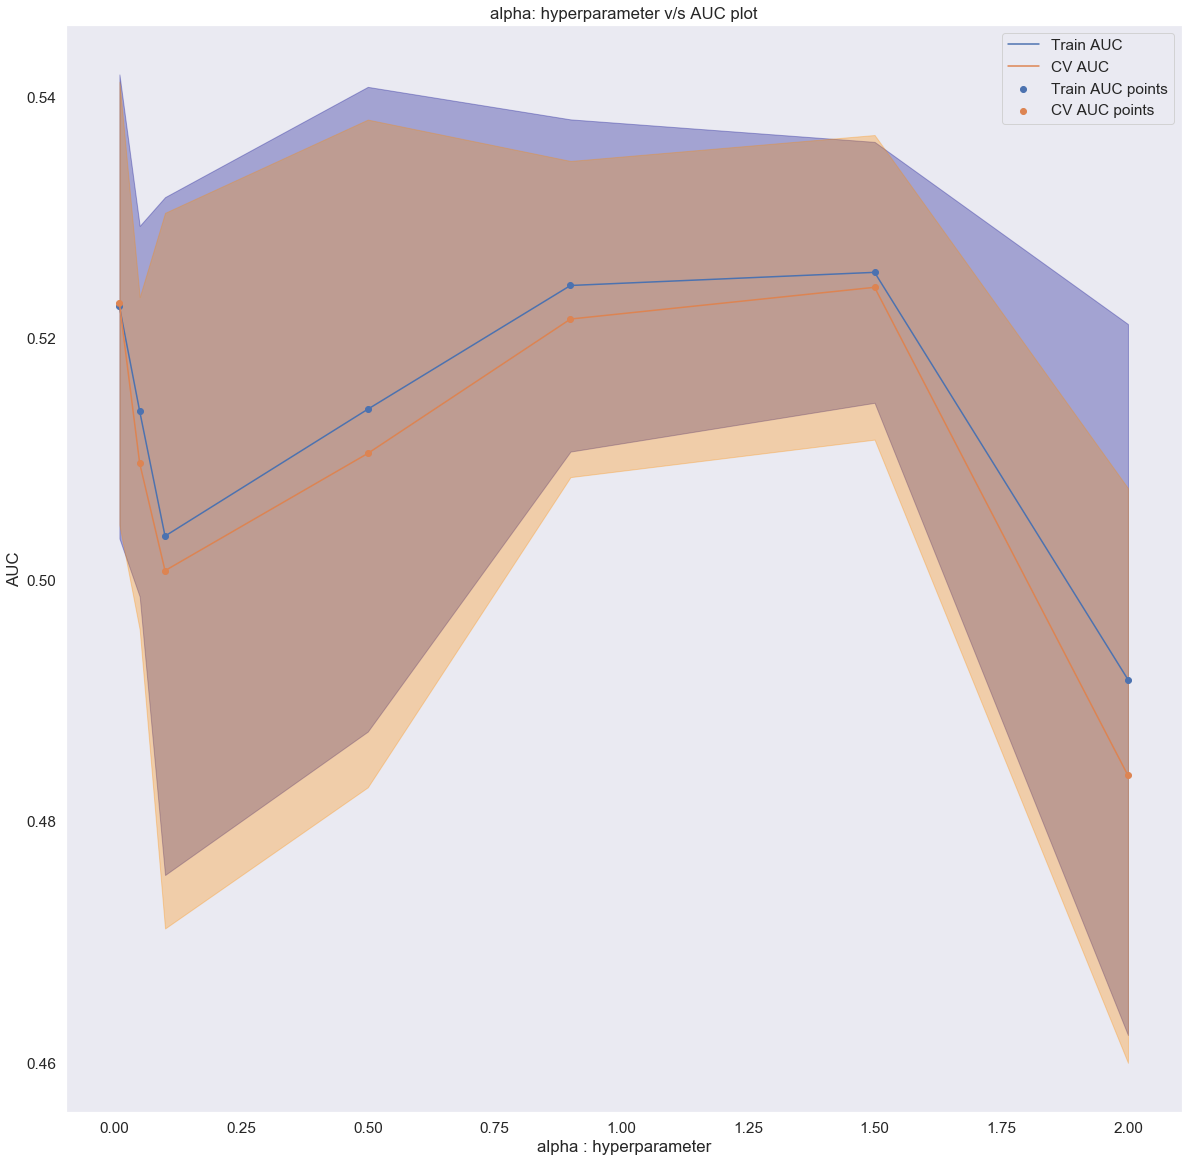

Wall time: 1.19 s


In [348]:
%%time
from sklearn.linear_model import SGDClassifier 

sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[0.01, 0.05, 0.1, 0.5, 0.9, 1.5, 2.0]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,20))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

## B) GridSearchCV (3 fold Cross Validation - adjusted for train time issues) - L1 regularization

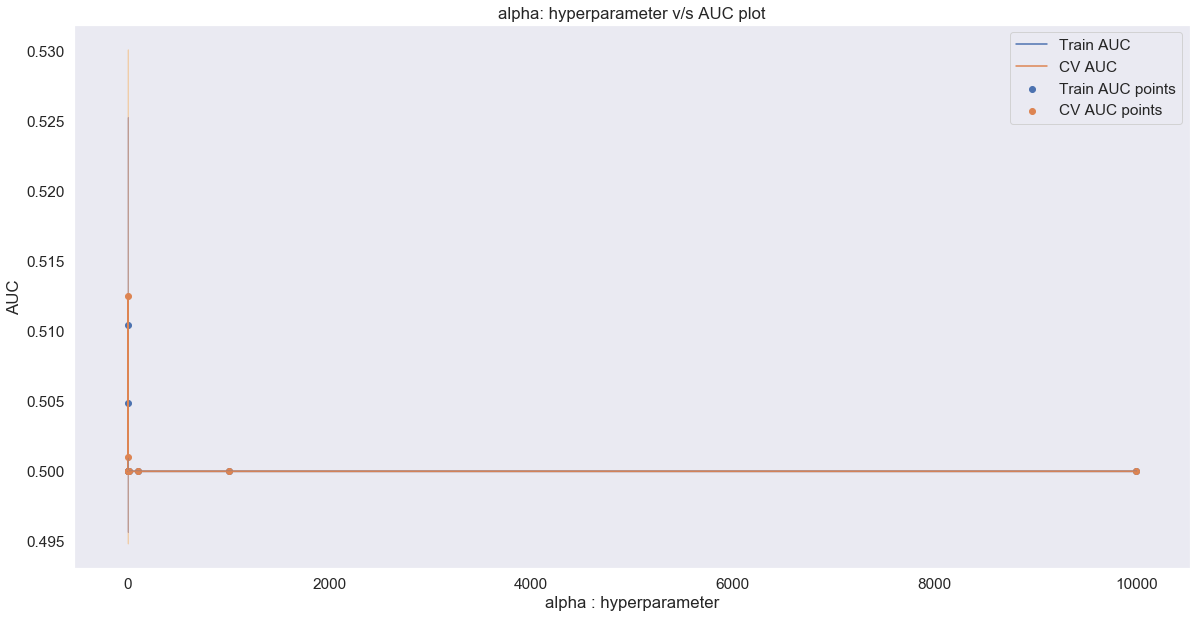

Wall time: 755 ms


In [349]:
%%time
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

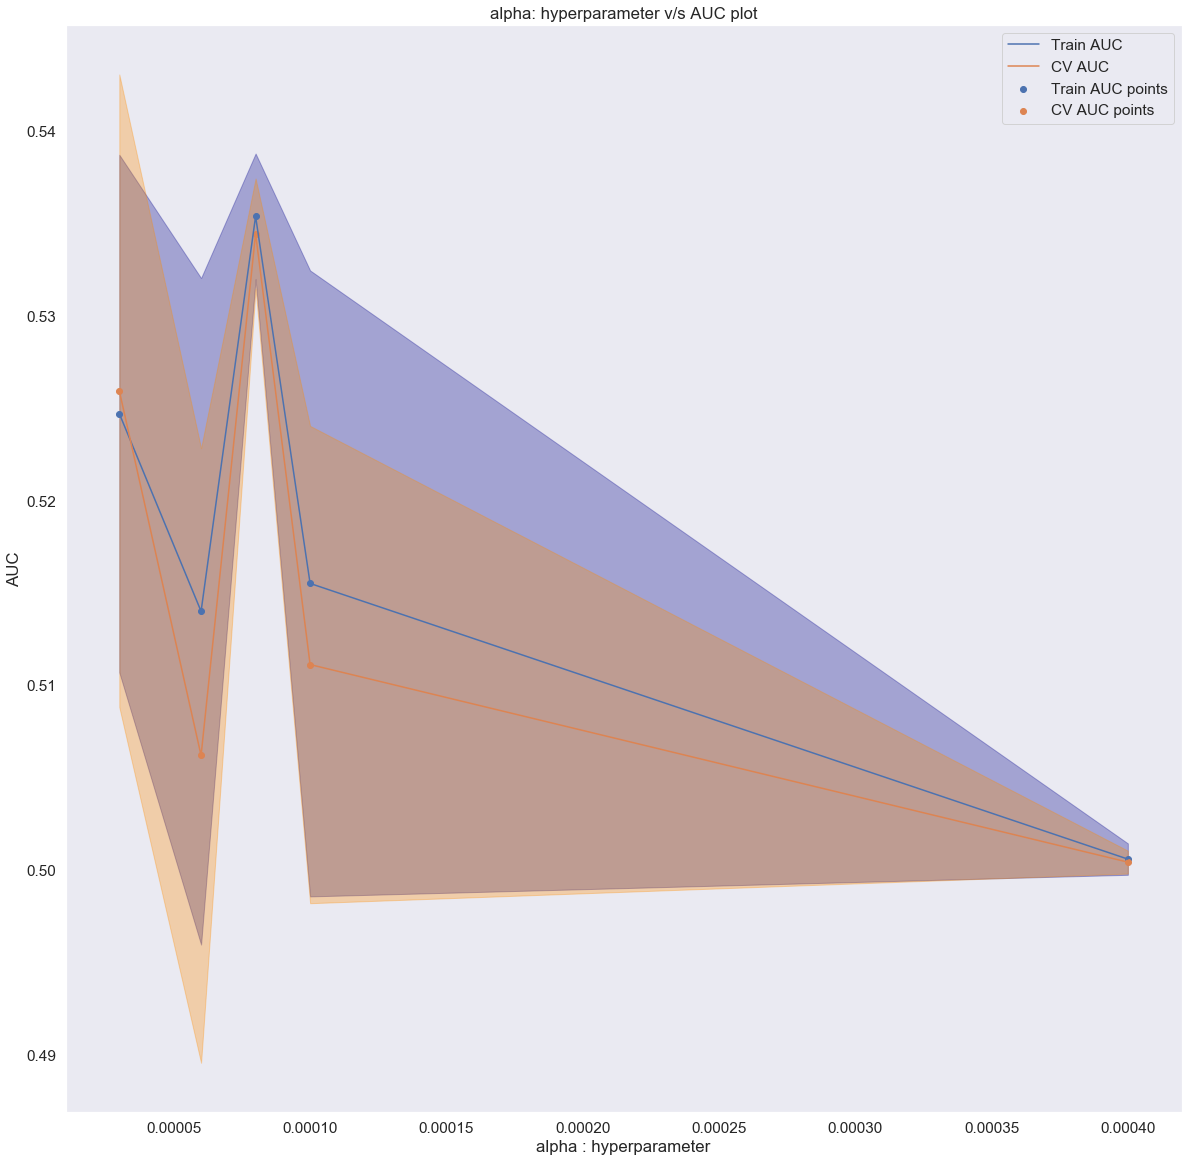

Wall time: 769 ms


In [350]:
%%time
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[0.00003, 0.00006, 0.00008, 0.0001, 0.0004]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc', return_train_score = True, n_jobs = -1)

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,20))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

## C) Train the model using the best hyper parameter value

In [331]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001)

model.fit(final_df, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.decision_function(final_df)   
y_test_pred = model.decision_function(final_df_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

ValueError: X has 8092 features per sample; expecting 72

## D) Confusion Matrix

##### Train Data

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)))

In [ ]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_tpr, train_fpr)), range(2),range(2))

In [ ]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

##### Test Data

In [ ]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)))

In [ ]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_tpr, test_fpr)), range(2),range(2))


In [ ]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

# 3. Conclusion

In [ ]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Decision Trees","(10, 100)", 0.665, 0.615])
x.add_row(["TFIDF", "Decision Trees", "(10, 500)", 0.653, 0.615])
x.add_row(["AVG W2V", "Decision Trees", "(5, 500)", 0.637, 0.602])
x.add_row(["TFIDF W2V", "Decision Trees", "(10, 100)", 0.586, 0.555])
x.add_row(["TFIDF-5k Features", "Linear SVM", "[L1 penalty, alpha = 0.00009]", 0.648, 0.635])